In [ ]:
"""
# DESAFÍO ALURA STORE

**Análisis de ventas, rendimiento y reseñas de 4 tiendas de la cadena ALURA STORE.**

**OBJETIVO:**
Identificar la tienda menos eficiente y presentar una recomendación basada en datos analizados

"""

'\n# DESAFÍO ALURA STORE\n\n**Análisis de ventas, rendimiento y reseñas de 4 tiendas de la cadena ALURA STORE.**\n\n**OBJETIVO:**\nIdentificar la tienda menos eficiente y presentar una recomendación basada en datos analizados\n\n'

In [ ]:
#Librerias identificadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar datos de las tiendas CSV
tienda_1 = pd.read_csv('../dataset/tienda_1 .csv')
tienda_2 = pd.read_csv('../dataset/tienda_2.csv')
tienda_3 = pd.read_csv('../dataset/tienda_3.csv')
tienda_4 = pd.read_csv('../dataset/tienda_4.csv')

In [ ]:
#Agregar una columna tienda, para unificar todos los CSV
tienda_1["Tienda"] = "Tienda 1"
tienda_2["Tienda"] = "Tienda 2"
tienda_3["Tienda"] = "Tienda 3"
tienda_4["Tienda"] = "Tienda 4"

In [ ]:
#Unificación de CSV
datos_tiendas = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index = True)

In [ ]:
#Validación de funcionamiento
datos_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [ ]:
#validación de nulls
datos_tiendas.isnull().sum()

Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
Tienda                    0
dtype: int64

In [ ]:
#convertir fecha de compra a tipo datatime
datos_tiendas["Fecha de Compra"] = pd.to_datetime(datos_tiendas["Fecha de Compra"], dayfirst=True)

In [ ]:
datos_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  Tienda                  9435 non-null   object  

In [ ]:
#METRICA 1: Ingresos totales por tienda
ingresos_por_tienda = datos_tiendas.groupby("Tienda")["Precio"].sum()
print(ingresos_por_tienda)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


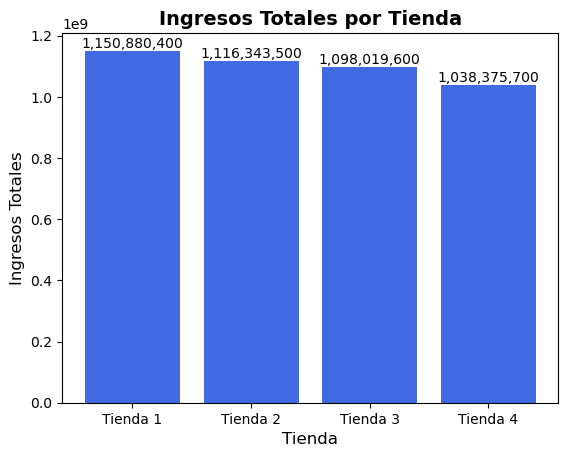

In [ ]:
#METRICA 1: Grafico de Ingresos Totales
import matplotlib.pyplot as plt

barras = plt.bar(ingresos_por_tienda.index, ingresos_por_tienda.values, color='royalblue')

# Títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales', fontsize=12)

# Mostrar los valores arriba de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, f'{altura:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
#METRICA 2: Cantidad de productos vendidos por tienda
cantidad_productos = datos_tiendas.groupby("Tienda")["Producto"].count()
print(cantidad_productos)

Tienda
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
Name: Producto, dtype: int64


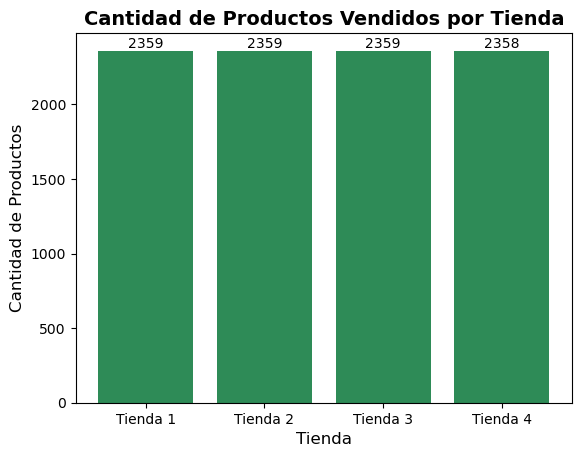

In [ ]:
# METRICA 2: Gráfico de cantidad de productos vendidos por tienda
barras = plt.bar(cantidad_productos.index, cantidad_productos.values, color='seagreen')

# Títulos y etiquetas
plt.title('Cantidad de Productos Vendidos por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad de Productos', fontsize=12)

# Mostrar los valores arriba de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, f'{int(altura)}',
             ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
#METRICA 3: Lugar de compra y contar productos
lugares_compra = datos_tiendas['Lugar de Compra'].value_counts()
print(lugares_compra)

Lugar de Compra
Bogotá           3943
Medellín         2314
Cali             1007
Pereira           517
Barranquilla      310
Cartagena         242
Cúcuta            186
Bucaramanga       181
Riohacha          163
Santa Marta       151
Leticia           142
Pasto              94
Manizales          41
Neiva              40
Villavicencio      29
Armenia            28
Soacha             19
Inírida            14
Valledupar         14
Name: count, dtype: int64


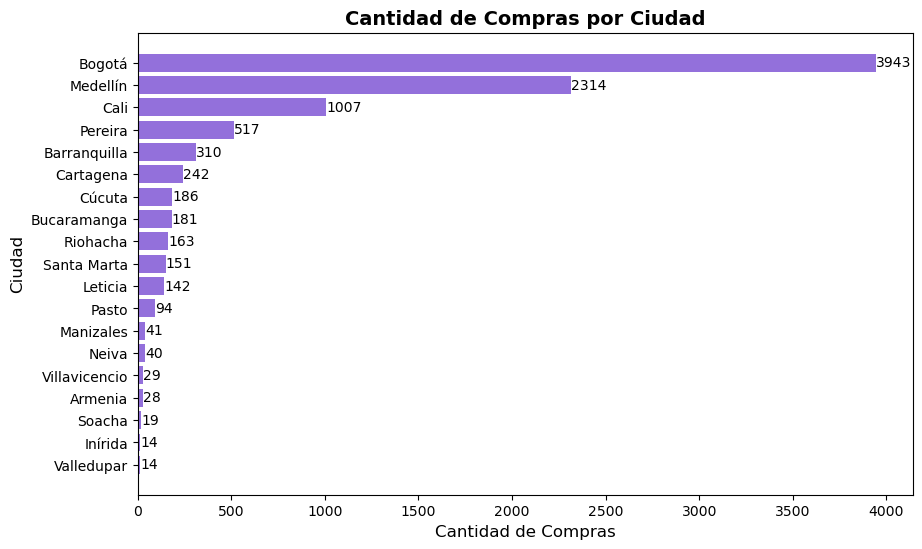

In [ ]:
# METRICA 3: Gráfico de lugares de compra más frecuentes
plt.figure(figsize=(10,6))
barras = plt.barh(lugares_compra.index, lugares_compra.values, color='mediumpurple')

# Títulos y etiquetas
plt.title('Cantidad de Compras por Ciudad', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Compras', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)

# Mostrar los valores al lado de cada barra
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f'{int(ancho)}',
             ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Para que la ciudad con más compras quede arriba
plt.show()

In [ ]:
#METRICA 4: Agrupar por metodo de pago
metodos_pago = datos_tiendas['Método de pago'].value_counts()
print(metodos_pago)

Método de pago
Tarjeta de crédito    6898
Nequi                 1900
Cupón                  504
Tarjeta de débito      133
Name: count, dtype: int64


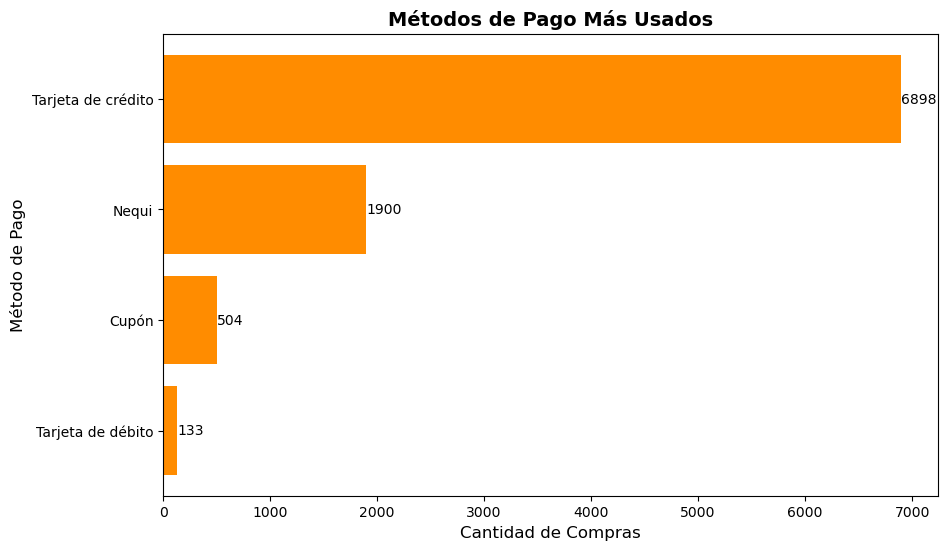

In [ ]:
# METRICA 4: Gráfico de métodos de pago más usados
plt.figure(figsize=(10,6))
barras = plt.barh(metodos_pago.index, metodos_pago.values, color='darkorange')

# Títulos y etiquetas
plt.title('Métodos de Pago Más Usados', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Compras', fontsize=12)
plt.ylabel('Método de Pago', fontsize=12)

# Mostrar los valores al lado de cada barra
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f'{int(ancho)}',
             ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

In [ ]:
#METRICA 5: Agrupar por producto y contar cuantas veces se vendio
ranking_productos = datos_tiendas['Producto'].value_counts()
print(ranking_productos)

Producto
Mesa de noche                  210
Microondas                     206
Carrito de control remoto      206
Batería                        203
Cama king                      201
Set de ollas                   200
Secadora de ropa               200
Modelado predictivo            200
Cama box                       199
Bloques de construcción        199
Iphone 15                      198
Armario                        197
Pandereta                      197
Balón de baloncesto            197
Bicicleta                      196
Iniciando en programación      195
Smart TV                       192
Refrigerador                   191
Lavavajillas                   189
Cubertería                     189
Guitarra acústica              188
Impresora                      188
Kit de bancas                  188
Estufa                         187
Vaso térmico                   187
TV LED UHD 4K                  187
Cuerda para saltar             186
Mesa de comedor                185
Balón de vo

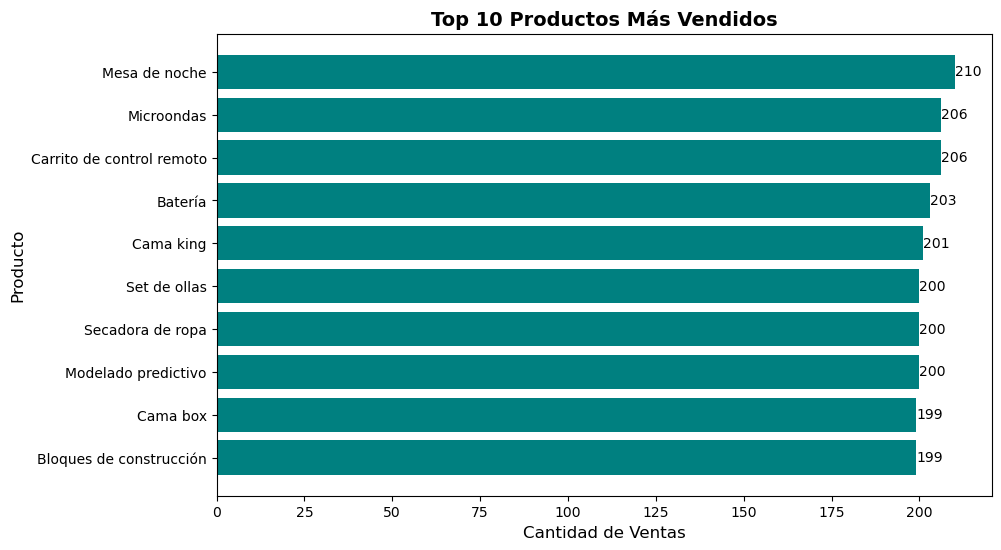

In [ ]:
#METRICA 5: Grafico de prodcutos mas vendidos.
plt.figure(figsize=(10,6))
top_productos = ranking_productos.head(10)  # Mostramos solo el TOP 10 para que sea más claro

barras = plt.barh(top_productos.index, top_productos.values, color='teal')

# Títulos y etiquetas
plt.title('Top 10 Productos Más Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ventas', fontsize=12)
plt.ylabel('Producto', fontsize=12)

# Mostrar los valores al lado de cada barra
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f'{int(ancho)}',
             ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

In [ ]:
#METRICA 6: Agrupar con categoria y ventas por categorias
ranking_categorias = datos_tiendas['Categoría del Producto'].value_counts()
print(ranking_categorias)

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


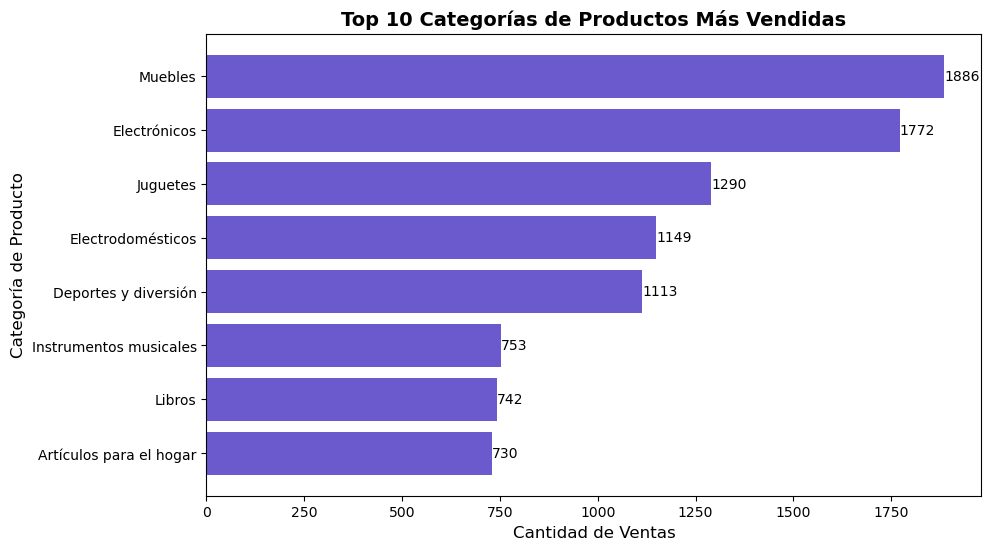

In [ ]:
#METRICA 6: Grafico de categorias mas vendidas
plt.figure(figsize=(10,6))
top_categorias = ranking_categorias.head(10)  # Mostramos solo las 10 principales categorías

barras = plt.barh(top_categorias.index, top_categorias.values, color='slateblue')

# Títulos y etiquetas
plt.title('Top 10 Categorías de Productos Más Vendidas', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ventas', fontsize=12)
plt.ylabel('Categoría de Producto', fontsize=12)

# Mostrar los valores al lado de cada barra
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f'{int(ancho)}',
             ha='left', va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

In [ ]:
"""
# Conclusión General

**¿Qué tienda es mejor?**
Según el análisis de ingresos totales y volumen de ventas, la Tienda 1 presenta el mejor desempeño
financiero, con mayores ingresos acumulados y un volumen de ventas superior al resto de tiendas.
Esto indica un posicionamiento sólido en el mercado.

**¿Qué tienda tiene problemas?**
La Tienda 4 muestra el desempeño más bajo en ingresos y volumen de ventas. Además,
presenta calificaciones ligeramente inferiores respecto a las demás,
lo cual puede estar relacionado con factores como atención al cliente,
ubicación o logística de entrega.

**¿Qué se recomienda hacer?**

- **Tienda 1:** Reforzar la estrategia de marketing para mantener el liderazgo y
fidelizar a los clientes actuales.

- **Tienda 2 y Tienda 3:** Explorar nuevas oportunidades de mercado o
aumentar la inversión en campañas de promociones para alcanzar a la Tienda 1.

- **Tienda 4:** Realizar un diagnóstico interno detallado para identificar
causas del bajo rendimiento. Se recomienda mejorar la experiencia del cliente, optimizar los métodos de entrega y evaluar la conveniencia de continuar operando en su ubicación actual.

"""